<a href="https://colab.research.google.com/github/Vineetttt/MachineLearning-II/blob/main/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def perceptron(x,w,b):
  y_in = w*x + b
  y_hat = sigmoid(y_in)
  return y_hat

def sigmoid(y_in):
  return 1/(1+np.exp(-y_in))

def grad_w(x,y,w,b):
  y_hat = perceptron(x,w,b)
  return (y_hat-y)*y_hat*(1-y_hat)*x

def grad_b(x,y,w,b):
  y_hat = perceptron(x,w,b)
  return (y_hat-y)*y_hat*(1-y_hat)

Batch Gradiend Descent

In [49]:
def batch_gd(X,Y,c,epoch):
  w = np.random.rand()
  b = np.random.rand()
  losses = []
  for i in range(epoch):
    dw,db,loss = 0,0,0
    for x,y in zip(X,Y):
      y_hat = perceptron(x,w,b)
      loss += (y_hat - y)**2
      dw += grad_w(x,y,w,b)
      db += grad_b(x,y,w,b)
    w -= dw*c
    b -= db*c
    losses.append(loss)
  return w,b,losses

Final Weight: 1.485576493698336
Final Bias: -1.827755218213767


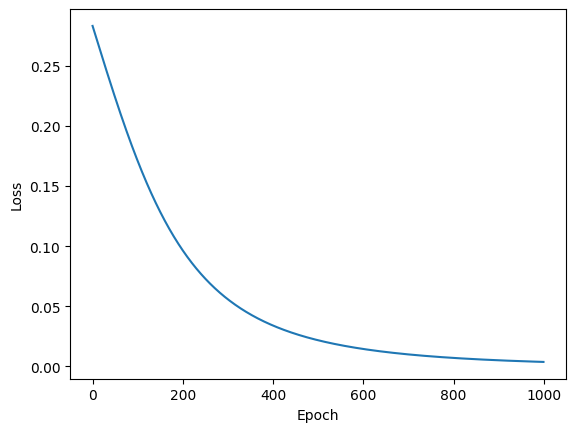

In [50]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w,b,losses = batch_gd(X,Y,0.1,1000)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Mini Batch Gradient Descent

In [37]:
def mini_batch_gd(X, Y, learning_rate, epochs, batch_size):
    w = np.random.rand()
    b = np.random.rand()
    losses = []

    for epoch in range(epochs):
        dw, db, epoch_loss = 0, 0, 0
        for x, y in zip(X, Y):
            y_hat = perceptron(x, w, b)
            epoch_loss += np.mean((y_hat - y)**2)

            dw += grad_w(x, y, w, b)
            db += grad_b(x, y, w, b)

        w -= dw * learning_rate / len(X)
        b -= db * learning_rate / len(X)
        losses.append(epoch_loss)

    return w, b, losses

Final Weight: 0.8307654579480303
Final Bias: 0.3238149088693639


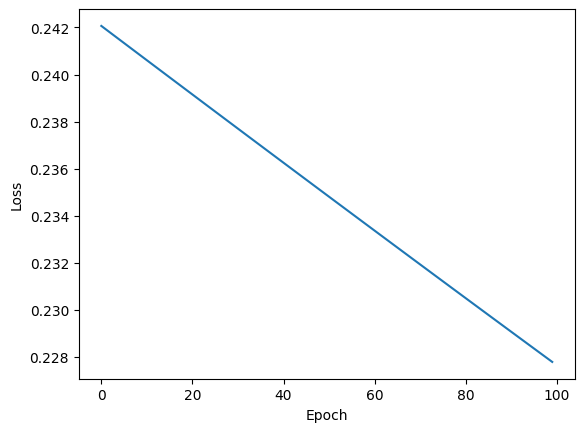

In [45]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w,b,losses = mini_batch_gd(X,Y,0.01,100,10)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Momentum Based Gradient Descent

In [46]:
def momentum_gd(X,Y,momentum,c,epoch):
  w = np.random.rand()
  b = np.random.rand()
  losses = []
  vw,vb = 0,0

  for i in range(epoch):
    dw,db,loss = 0,0,0
    for x,y in zip(X,Y):
      y_hat = perceptron(x,w,b)
      loss += (y_hat - y)**2

      dw += grad_w(x,y,w,b)
      db += grad_b(x,y,w,b)

    vw = vw*momentum + (1-momentum)*dw
    vb = vb*momentum + (1-momentum)*db
    w -= vw*c
    b -= vb*c
    losses.append(loss)
  return w,b,losses

Final Weight: 0.9049035395121022
Final Bias: 0.38076900880954434


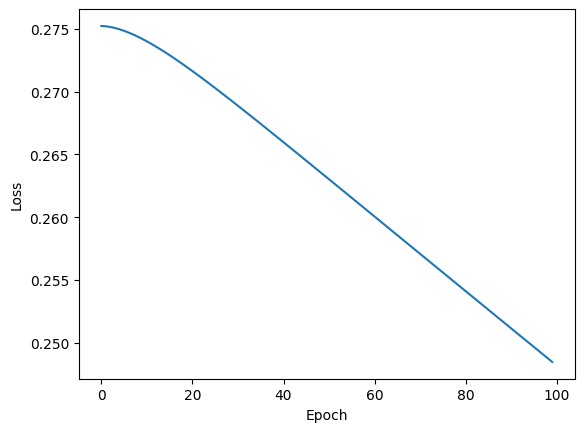

In [48]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w,b,losses = momentum_gd(X,Y,0.9,0.01,100)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Adaptive Delta Gradient Descent

In [60]:
def adaptive_delta_gd(X,Y,rho,epsilon,epoch):
  w = np.random.rand()
  b = np.random.rand()
  delta_w,delta_b = 0,0
  E_dw,E_db = 0,0
  losses = []

  for i in range(epoch):
    dw,db,loss = 0,0,0
    for x,y in zip(X,Y):
      y_hat = perceptron(x,w,b)
      loss += (y_hat - y)**2

      dw += grad_w(x,y,w,b)
      db += grad_b(x,y,w,b)

      E_dw = E_dw*rho + (1-rho)*(dw**2)
      E_db = E_db*rho + (1-rho)*(db**2)

      delta_w = -np.sqrt(abs(delta_w + epsilon)) / (np.sqrt(E_dw + epsilon)) * dw
      delta_b = -np.sqrt(abs(delta_b + epsilon)) / (np.sqrt(E_db + epsilon)) * db

      w += delta_w
      b += delta_b
    losses.append(loss)
  return w,b,losses

Final Weight: 1.7917615471205965
Final Bias: -2.2821763900516334


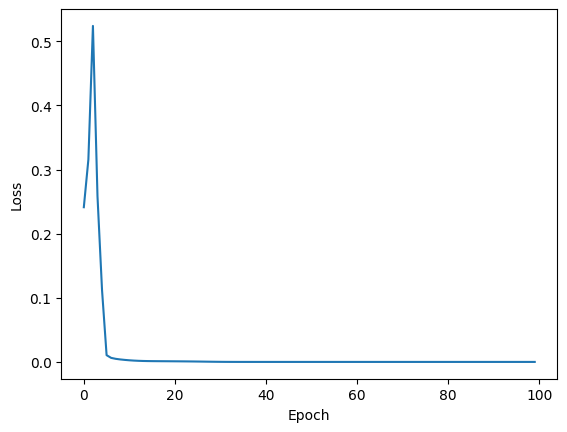

In [61]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w,b,losses = adaptive_delta_gd(X,Y,0.9,1e-8,100)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Adam Optimiser

In [66]:
def adam_optimiser(X,Y,c,epoch,beta1,beta2,epsilon):
  w = np.random.rand()
  b = np.random.rand()
  mw,mb = 0,0
  vw,vb = 0,0
  t = 0
  losses = []

  for i in range(epoch):
    dw,db,loss = 0,0,0
    for x,y in zip(X,Y):
      t += 1
      y_hat = perceptron(x,w,b)
      loss += (y_hat - y)**2

      dw += grad_w(x,y,w,b)
      db += grad_b(x,y,w,b)

      mw = mw*beta1 + (1-beta1)*dw
      mb = mb*beta1 + (1-beta1)*db

      vw = vw*beta2 + (1-beta1)*(dw**2)
      vb = vb*beta2 + (1-beta2)*(db**2)

      mw_hat = mw/(1-beta1*t)
      mb_hat = mb/(1-beta1*t)
      vw_hat = vw/(1-beta2*t)
      vb_hat = vb/(1-beta2*t)

      w += c * mw_hat / (np.sqrt(abs(vw_hat)) + epsilon)
      b += c * mb_hat / (np.sqrt(abs(vb_hat)) + epsilon)
    losses.append(loss)

  return w,b,losses

Final Weight: 0.828801740039119
Final Bias: 0.08617865786570174


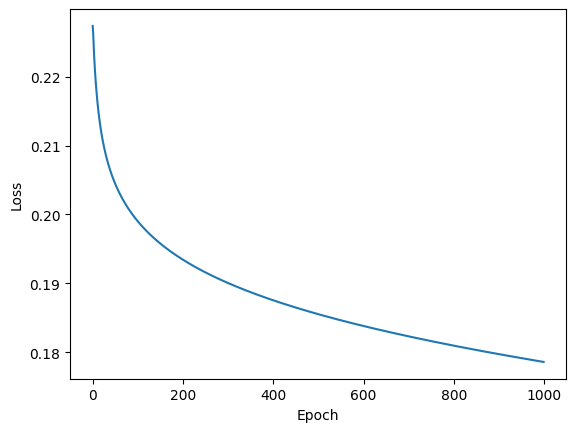

In [67]:
alpha = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = 1000
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w,b,losses = adam_optimiser(X,Y,alpha,epochs,beta1,beta2,epsilon)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Adagrad Optimiser

In [71]:
def adagrad_optimiser(X,Y,c,epochs,epsilon):
  w = np.random.rand()
  b = np.random.rand()
  grad_squared_w, grad_squared_b = 0,0
  losses = []

  for i in range(epochs):
    dw,db,loss = 0,0,0
    for x,y in zip(X,Y):
      y_hat = perceptron(x,w,b)
      loss += (y_hat - y)**2

      dw += grad_w(x,y,w,b)
      db += grad_b(x,y,w,b)

      grad_squared_w += dw**2
      grad_squared_b += db**2

      w -= c*dw / (np.sqrt(grad_squared_w)+epsilon)
      b -= c*db / (np.sqrt(grad_squared_b)+epsilon)
    losses.append(loss)
  return w,b,losses

Final Weight: 0.35687802639853405
Final Bias: -0.0633589932389603


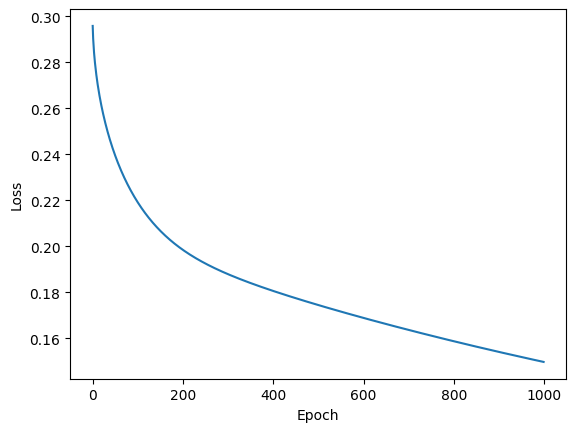

In [72]:
alpha = 0.01
epsilon = 1e-8
epochs = 1000
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w,b,losses = adagrad_optimiser(X,Y,alpha,epochs,epsilon)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Nestrov Accelerated Gradient Descent

In [79]:
def nesterov_optimizer(X, Y, alpha, gamma, epochs):
    w = np.random.rand()
    b = np.random.rand()
    v_w = 0
    v_b = 0
    losses = []

    for epoch in range(epochs):
        dw, db, epoch_loss = 0, 0, 0

        for x, y in zip(X, Y):
            w_ahead = w - gamma * v_w
            b_ahead = b - gamma * v_b

            y_hat = perceptron(x, w_ahead, b_ahead)
            epoch_loss += np.mean((y_hat - y)**2)

            dw = grad_w(x, y, w_ahead, b_ahead)
            db = grad_b(x, y, w_ahead, b_ahead)

            v_w = gamma * v_w + alpha * dw
            v_b = gamma * v_b + alpha * db

            w -= v_w
            b -= v_b

        losses.append(epoch_loss)

    return w, b, losses

Final Weight: 1.5042597289489266
Final Bias: -1.8563721715477055


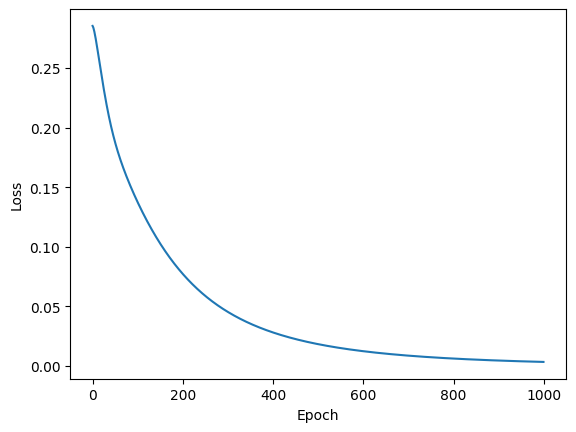

In [80]:
alpha = 0.01
gamma = 0.9
epochs = 1000
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
w, b, losses = nesterov_optimizer(X, Y, alpha, gamma, epochs)
print("Final Weight:",w)
print("Final Bias:",b)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()